Read CSV

In [17]:
import csv
import numpy as np 
import pandas as pd


data = pd.read_csv("dataset_left.csv")

In [18]:
data

,timestamp,displacement
0,2024-07-19 20:00:05,273.536763
1,2024-07-19 20:00:06,272.046915
2,2024-07-19 20:00:07,274.070623
3,2024-07-19 20:00:08,271.232968
4,2024-07-19 20:00:09,270.861092
...,...,...
647992,2024-07-27 07:59:57,275.228871
647993,2024-07-27 07:59:58,275.030999
647994,2024-07-27 07:59:59,274.970182
647995,2024-07-27 08:00:00,274.983518


In [19]:

data.set_index("timestamp", inplace=True)

In [23]:
data

,displacement
timestamp,
2024-07-19 20:00:05,273.536763
2024-07-19 20:00:06,272.046915
2024-07-19 20:00:07,274.070623
2024-07-19 20:00:08,271.232968
2024-07-19 20:00:09,270.861092
...,...
2024-07-27 07:59:57,275.228871
2024-07-27 07:59:58,275.030999
2024-07-27 07:59:59,274.970182


In [24]:
data

,displacement
timestamp,
2024-07-19 20:00:05,273.536763
2024-07-19 20:00:06,272.046915
2024-07-19 20:00:07,274.070623
2024-07-19 20:00:08,271.232968
2024-07-19 20:00:09,270.861092
...,...
2024-07-27 07:59:57,275.228871
2024-07-27 07:59:58,275.030999
2024-07-27 07:59:59,274.970182


In [16]:
# data.index = pd.to_datetime(data.index)
# df_resampled = data.resample('1S').mean()

# df_resampled.to_csv("dataset_left.csv")

C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_30760\3829421937.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = data.resample('1S').mean()


,displacement
timestamp,
2024-07-19 20:00:05,273.536763
2024-07-19 20:00:06,272.046915
2024-07-19 20:00:07,274.070623
2024-07-19 20:00:08,271.232968
2024-07-19 20:00:09,270.861092
...,...
2024-07-19 20:32:59,276.374656
2024-07-19 20:33:00,275.070891
2024-07-19 20:33:01,276.576425


Text(0, 0.5, 'Target Variable')

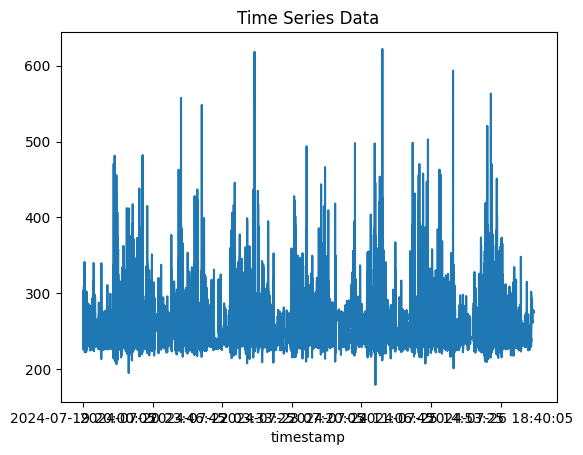

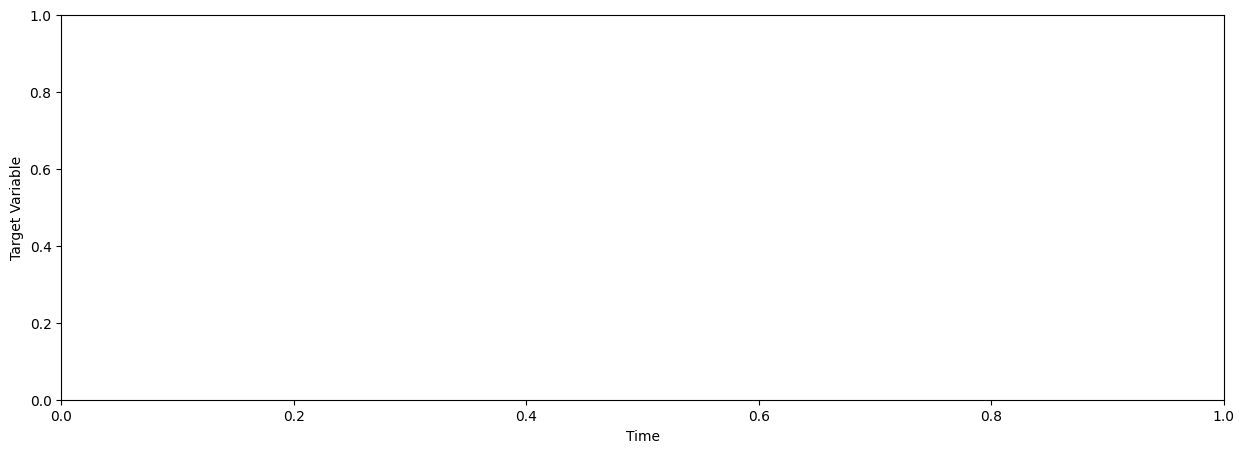

In [29]:
import matplotlib.pyplot as plt

# Assuming `data` is your dataframe and the time series is in a column `target`
data['displacement'].plot()

plt.title('Time Series Data')
plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['displacement'].head(1000))
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing might be needed.")


p-value: 1.536311523764834e-07
The data is stationary.


C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_30760\2006385326.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['displacement'] = train['displacement'].fillna(method='ffill')
C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_30760\2006385326.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['displacement'] = train['displacement'].fillna(method='ffill')
c:\Users\Visal Kao\.conda\envs\2IA_ML_ADVANCED\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Visal Kao

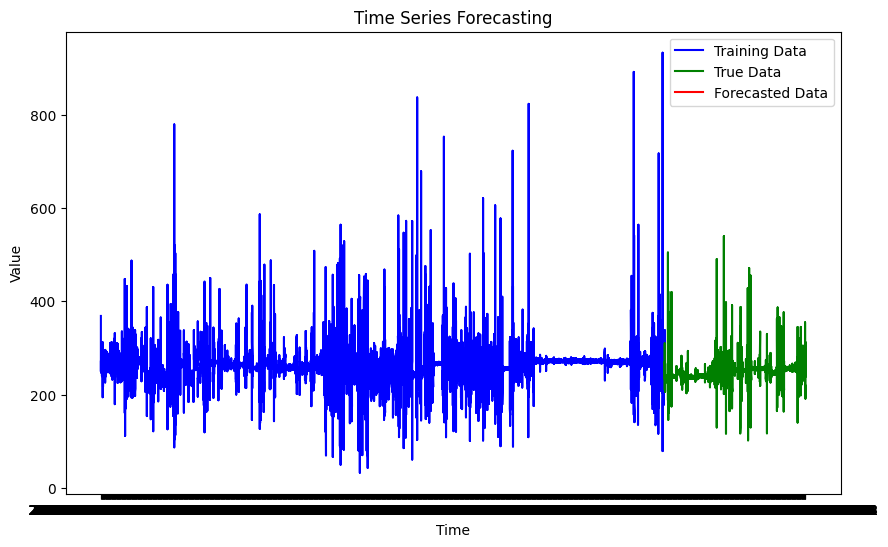

In [9]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # Load the data (ensure 'timestamp' is your time column and 'target' is the column you're forecasting)
# # data = pd.read_csv('your_time_series_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# # Check for stationarity and differencing if needed
data = data.head(100000)
# # Split into train and test
# train_size = int(len(data) * 0.8)
# train, test = data[:train_size], data[train_size:]

# # Fit ARIMA model (adjust p, d, q based on your data)
# model = ARIMA(train['displacement'], order=(5,1,0))
# model_fit = model.fit()

# # Forecast the test set
# forecast = model_fit.forecast(steps=len(test))

# Plot the results
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame, 'timestamp' is the datetime column, and 'target' is the value you're forecasting

# Split into train and test (80% train, 20% test for example)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
train['displacement'] = train['displacement'].fillna(method='ffill')
# Fit ARIMA model (adjust p, d, q based on your data)
model = ARIMA(train['displacement'], order=(1,0,3))  # Adjust (p, d, q) based on your dataset
model_fit = model.fit()

# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Create a DataFrame for the forecast with the same index as the test set
forecast_index = test.index
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(train.index, train['displacement'], label='Training Data', color='blue')
plt.plot(test.index, test['displacement'], label='True Data', color='green')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecasting')
plt.show()



In [10]:
# from pmdarima import auto_arima

# model_auto = auto_arima(train['displacement'], seasonal=False, stepwise=True, trace=True)
# model_auto.summary()

forecast_df

,Forecast
timestamp,
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
...,...
2024-07-19 20:33:03,NaN
2024-07-19 20:33:03,NaN
2024-07-19 20:33:03,NaN


In [ ]:
import tensorflow as tf
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow.keras import layers, models

In [ ]:



def unet_1d(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    conv1 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(inputs)
    conv1 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2)(conv1)
    
    conv2 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(pool1)
    conv2 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2)(conv2)
    
    conv3 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(pool2)
    conv3 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(conv3)
    pool3 = layers.MaxPooling1D(pool_size=2)(conv3)
    
    # Bottleneck
    conv4 = layers.Conv1D(512, kernel_size=3, padding="same", activation="relu")(pool3)
    conv4 = layers.Conv1D(512, kernel_size=3, padding="same", activation="relu")(conv4)
    
    # Decoder
    up5 = layers.UpSampling1D(size=2)(conv4)
    print(up5)
    print(conv3)
    # conv3_resized = layers.Cropping1D(cropping=(0, 1))(conv3)
    concat5 = layers.Concatenate()([up5, conv3])
    conv5 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(concat5)
    conv5 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(conv5)
    
    up6 = layers.UpSampling1D(size=2)(conv5)
    print(up6)
    print(conv2)
    # Example of resizing data
    # conv2_resized = resize_to_match(conv2, tf.shape(up6)[1])
    # conv2_resized = layers.Lambda(lambda x: tf.squeeze(x, axis=2))(conv2_resized)  # Remove the extra dimension

    concat6 = layers.Concatenate()([up6, conv2])
    conv6 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(concat6)
    conv6 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(conv6)
    
    up7 = layers.UpSampling1D(size=2)(conv6)
    concat7 = layers.Concatenate()([up7, conv1])
    conv7 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(concat7)
    conv7 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(conv7)
    
    # Output
    outputs = layers.Conv1D(num_classes, kernel_size=1, activation="softmax")(conv7)
    
    model = models.Model(inputs, outputs)
    return model

# # Model Parameters
# input_shape = (647995, 2)  
# num_classes = 7
# model = unet_1d(input_shape, num_classes)

# # Model Summary
# model.summary()

In [ ]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv("full_dataset.csv", index_col="timestamp")

data = data.iloc[:450000, :]
X = data[["displacement_left","displacement_right"]].values
y = data['Activity'].values 

# X = np.load("X_train.npy")
# y = np.load("y_train.npy")

num_classes = len(np.unique(y))
# num_classes = 7
len_x = len(X) 
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))  

X = X.reshape((1, len_x, 2)) 
y_one_hot = y_one_hot.reshape((1, len_x, num_classes)) 

# len(X)
# X = X[0:1,:,:]
# y = y[0:1,:,:]
X.shape

(1, 450000, 2)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Define the model
input_shape = (len_x, 2)  # Example input shape
print(input_shape)
print(num_classes)
model = unet_1d(input_shape, num_classes)

model.summary()
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Example training data
# import numpy as np
# X_train = np.random.rand(100, 100, 1)  # 100 samples, 100 time steps, 1 feature
# y_train = np.random.randint(0, num_classes, (100, 100, num_classes))  # One-hot encoded labels

# Train the model
# X = np.expand_dims(X, axis=0)  # Adds a batch dimension
# X = np.expand_dims(X, axis=1)  # Adds the time steps dimension

model.fit(X, y_one_hot, epochs=100, batch_size=1)


(450000, 2)
7
<KerasTensor shape=(None, 112500, 512), dtype=float32, sparse=False, name=keras_tensor_552>
<KerasTensor shape=(None, 112500, 256), dtype=float32, sparse=False, name=keras_tensor_548>
<KerasTensor shape=(None, 225000, 256), dtype=float32, sparse=False, name=keras_tensor_556>
<KerasTensor shape=(None, 225000, 128), dtype=float32, sparse=False, name=keras_tensor_545>


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 450000, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_321 (Conv1D) │ (None, 450000,    │        448 │ input_layer_24[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_322 (Conv1D) │ (None, 450000,    │     12,352 │ conv1d_321[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_69    │ (None, 225000,    │          0 │ conv1d_322[0][0]  │
│ (MaxPooling1D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_323 (Conv1D) │ (None, 225000,    │     24,704 │ max_pooling1d_69… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_324 (Conv1D) │ (None, 225000,    │     49,280 │ conv1d_323[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_70    │ (None, 112500,    │          0 │ conv1d_324[0][0]  │
│ (MaxPooling1D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_325 (Conv1D) │ (None, 112500,    │     98,560 │ max_pooling1d_70… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_326 (Conv1D) │ (None, 112500,    │    196,864 │ conv1d_325[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_71    │ (None, 56250,     │          0 │ conv1d_326[0][0]  │
│ (MaxPooling1D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_327 (Conv1D) │ (None, 56250,     │    393,728 │ max_pooling1d_71… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_328 (Conv1D) │ (None, 56250,     │    786,944 │ conv1d_327[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling1d_67    │ (None, 112500,    │          0 │ conv1d_328[0][0]  │
│ (UpSampling1D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_67      │ (None, 112500,    │          0 │ up_sampling1d_67… │
│ (Concatenate)       │ 768)              │            │ conv1d_326[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_329 (Conv1D) │ (None, 112500,    │    590,080 │ concatenate_67[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_330 (Conv1D) │ (None, 112500,    │    196,864 │ conv1d_329[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling1d_68    │ (None, 225000,    │          0 │ conv1d_330[0][0]

 Total params: 2,596,423 (9.90 MB)

 Trainable params: 2,596,423 (9.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.0631 - loss: 40.6280
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0631 - loss: 31.8925
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.0631 - loss: 24.4961
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.0631 - loss: 18.3599
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0631 - loss: 13.2675
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0628 - loss: 9.3239
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0120 - loss: 7.8539
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0120 - loss: 5.6507
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0125 - loss: 2.4849
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8983 - loss: 0.7132
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8987 - loss: 0.7878
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8987 - loss: 0.9900
Epoch 

In [ ]:
    # Predict the segmentation labels
predicted_labels = model.predict(X)
print(predicted_labels)
# Convert the predicted labels back to class indices
predicted_classes = np.argmax(predicted_labels, axis=-1)
print(predicted_classes)
predicted_classes

# import matplotlib.pyplot as plt

# # Plot the original time series data
# plt.figure(figsize=(14, 7))
# plt.subplot(2, 1, 1)
# plt.plot(data.index, data['displacement_left'], label='Feature 1')
# plt.plot(data.index, data['displacement_right'], label='Feature 2')
# plt.title('Original Time Series Data')
# plt.xlabel('Date')
# plt.ylabel('Feature Value')
# plt.legend()

# # Plot the predicted segmentation labels
# plt.subplot(2, 1, 2)
# plt.plot(data.index, predicted_classes[0], label='Predicted Segmentation')
# plt.title('Predicted Segmentation Labels')
# plt.xlabel('Date')
# plt.ylabel('Class')
# plt.legend()

# plt.tight_layout()
# plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[1.99486129e-03 7.22345954e-04 1.79871975e-03 ... 7.78365182e-04
   1.01404591e-08 9.85494018e-01]
  [1.28381180e-05 9.45724787e-06 7.73482554e-07 ... 1.10333276e-04
   2.87665820e-08 9.92640316e-01]
  [3.54007312e-08 3.08204122e-04 6.16751902e-04 ... 2.21753260e-04
   9.66045093e-08 9.98552382e-01]
  ...
  [1.05925358e-03 4.82325937e-04 1.08711647e-04 ... 6.71114506e-08
   9.39647543e-06 9.98314738e-01]
  [3.33068334e-02 2.02468168e-02 1.45362597e-03 ... 4.94143890e-08
   6.49312005e-06 9.44977403e-01]
  [3.21224965e-02 1.53111126e-02 1.76824069e-05 ... 3.41957365e-03
   4.50911932e-03 9.44617748e-01]]]
[[6 6 6 ... 6 6 6]]


array([[6, 6, 6, ..., 6, 6, 6]])

array([], shape=(0, 450000, 2), dtype=float64)

In [ ]:
predicted_classes_df = pd.DataFrame(np.transpose(predicted_classes), index= None)
predicted_classes_df.to_csv("test_result.csv")
print(len(np.unique(y)))
print(len(np.unique(predicted_classes)))
predicted_classes_df

7
3


,0
0,6
1,6
2,6
3,6
4,6
...,...
449995,6
449996,6
449997,6
449998,6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from bayesian_changepoint_detection.generate_data import generate_normal_time_series
from functools import partial
# Generate sample data
# data = generate_normal_time_series(n=300, sigma=1, means=[0, 5, 0])

# Bayesian Change Point Detection
# data = pd.read_csv("full_dataset.csv", index_col="timestamp")
# data.iloc[:45000, :]
data = pd.read_csv("full_dataset.csv", index_col="timestamp")
data = data["displacement_right"]
data = np.array(data.iloc[:35000])

Q, P, Pcp = offcd.offline_changepoint_detection(data.iloc[:45000, :], partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

plt.figure(figsize=(14, 7))
plt.plot(data)
for i in range(1, len(data)):
    plt.axvline(i, linestyle='--', color='red', alpha=Pcp[i])
plt.title('Bayesian Change Point Detection')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

[ 8.87100749e-01  1.34307753e-02 -1.62993261e+00 -2.55483495e-01
 -2.86912879e+00 -4.27903890e-01 -8.38756403e-01 -6.14917034e-01
 -3.36181402e-02 -1.16263385e+00 -1.52454461e+00  2.54089150e-01
 -1.03543599e+00 -2.03363064e-01 -6.32070684e-01 -4.85016761e-01
 -3.38742667e-01 -1.08827605e-01 -5.78631758e-02  1.45825113e+00
 -1.86245244e+00  2.76058978e-01 -8.36372027e-01 -4.89972304e-01
  3.49591072e-02 -6.00525608e-01  1.14068434e+00  7.18428787e-01
 -6.98109072e-01  5.10798999e-01 -1.28061964e+00 -6.16604984e-02
  7.44180805e-02  1.52383893e+00 -3.77244450e-01  1.45917493e-01
  7.80624737e-01 -1.05866825e-01 -6.14763848e-01 -2.18555209e+00
  5.80979942e-01  1.53798711e+00 -1.15552408e-01 -1.44237310e+00
  1.08189365e+00 -1.69120089e-01  5.81798292e-01 -8.34642018e-01
 -3.20741810e-01 -1.70096216e+00 -1.13326269e+00 -8.34573458e-01
 -3.34924719e-01 -1.73200999e+00 -2.46338967e+00  6.09563117e-01
 -3.21838024e-02  1.38405740e-01  2.66277744e-01  3.67203130e-01
  2.52658712e-01  4.41389

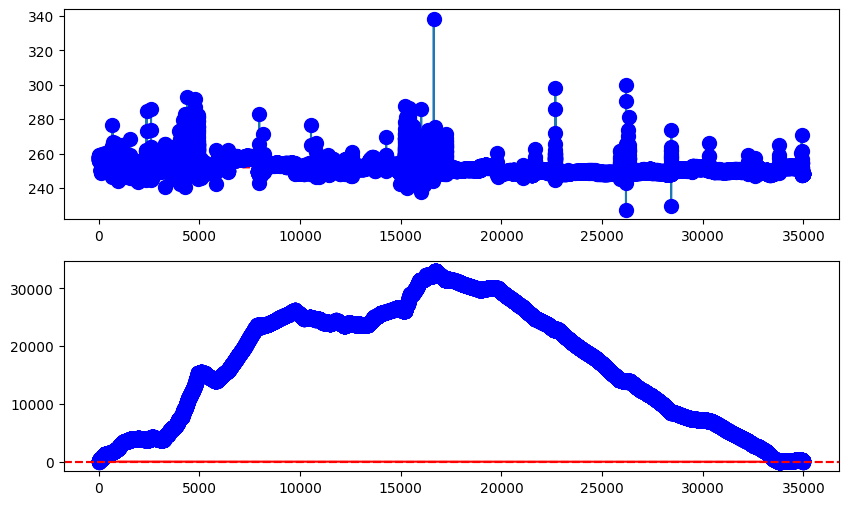

CUSUM Change Points: [    1     2     3 ... 34997 34998 34999]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cusum(data, threshold=1, show=True, drift=0, ending=False, plot=True):
    data = np.array(data)
    x, x_mean = np.arange(len(data)), data.mean()
    s = np.zeros(len(data))
    s[1:] = np.cumsum(data[1:] - x_mean - drift)
    s_positive = np.maximum(0, s)
    s_negative = np.minimum(0, s)
    g_positive = s != s_positive
    g_negative = s != s_negative
    t = np.arange(len(g_positive))
    g_positive_indexes = t[g_positive]
    g_negative_indexes = t[g_negative]
    n = len(data)

    if ending:
        g_positive_indexes = np.append(g_positive_indexes, n)
        g_negative_indexes = np.append(g_negative_indexes, n)

    change_points = np.unique(np.concatenate((g_positive_indexes, g_negative_indexes)))

    if plot:
        plt.figure(figsize=(10, 6))
        plt.subplot(211)
        plt.plot(x, data)
        plt.plot(x, x_mean*np.ones(len(data)), color='red', linestyle='--')
        if len(change_points) > 0:
            plt.plot(change_points, data[change_points], "o", markersize=10, color='blue')
        plt.subplot(212)
        plt.plot(x, s, color='black')
        plt.plot(x, s_positive, color='green')
        plt.plot(x, s_negative, color='red')
        if len(change_points) > 0:
            plt.plot(change_points, s[change_points], "o", markersize=10, color='blue')
        plt.axhline(y=threshold, color='red', linestyle='--')
        plt.axhline(y=-threshold, color='red', linestyle='--')
        plt.show()

    return change_points

# Example usage
data = np.random.randn(300)
data[100:200] += 5  # Introduce a change point
# print(type(data))
print(data)
data = pd.read_csv("full_dataset.csv", index_col="timestamp")
data = data["displacement_right"]
data = np.array(data.iloc[:35000])
change_points = cusum(data, threshold=1, plot=True)
print("CUSUM Change Points:", change_points)


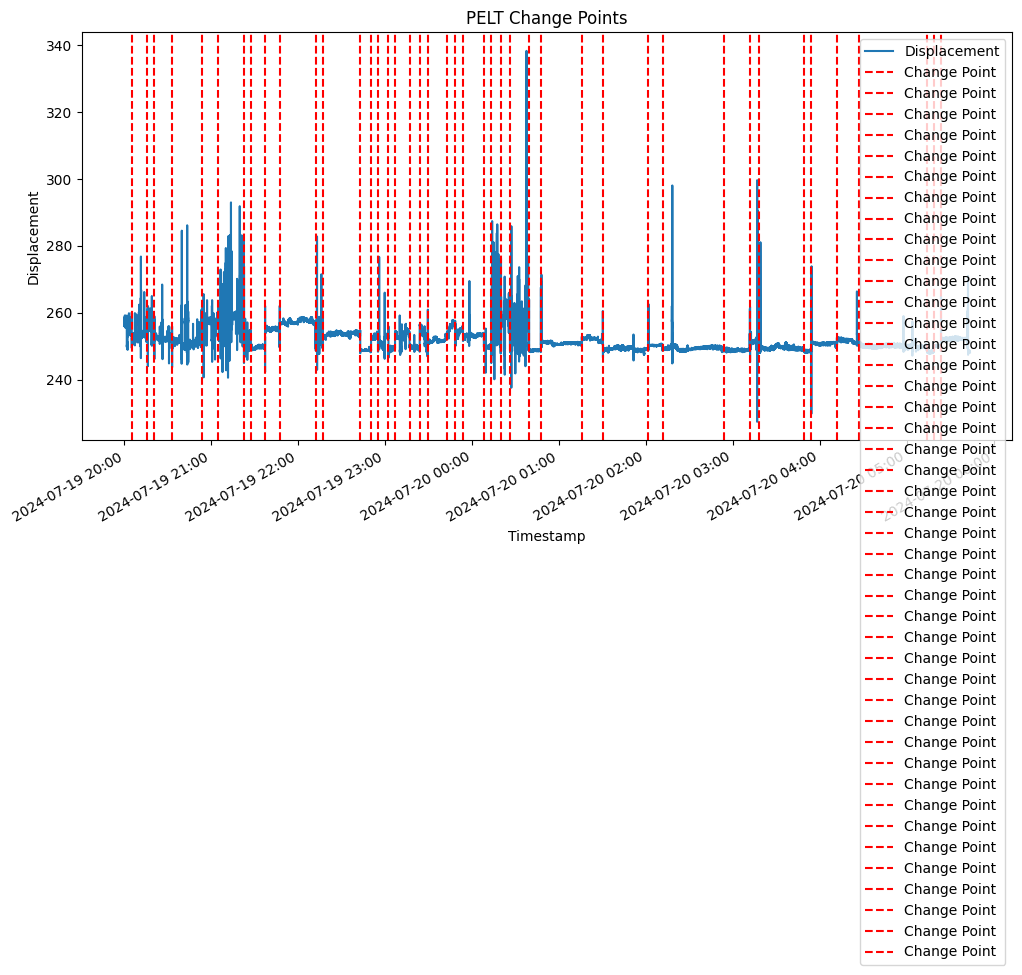

PELT Change Points: [Timestamp('2024-07-19 20:05:06'), Timestamp('2024-07-19 20:15:26'), Timestamp('2024-07-19 20:20:41'), Timestamp('2024-07-19 20:33:01'), Timestamp('2024-07-19 20:53:26'), Timestamp('2024-07-19 21:04:41'), Timestamp('2024-07-19 21:22:16'), Timestamp('2024-07-19 21:27:16'), Timestamp('2024-07-19 21:37:01'), Timestamp('2024-07-19 21:47:11'), Timestamp('2024-07-19 22:11:51'), Timestamp('2024-07-19 22:16:51'), Timestamp('2024-07-19 22:42:41'), Timestamp('2024-07-19 22:50:11'), Timestamp('2024-07-19 22:55:11'), Timestamp('2024-07-19 23:01:46'), Timestamp('2024-07-19 23:06:46'), Timestamp('2024-07-19 23:16:46'), Timestamp('2024-07-19 23:23:41'), Timestamp('2024-07-19 23:29:31'), Timestamp('2024-07-19 23:42:51'), Timestamp('2024-07-19 23:48:16'), Timestamp('2024-07-19 23:53:36'), Timestamp('2024-07-20 00:08:01'), Timestamp('2024-07-20 00:13:06'), Timestamp('2024-07-20 00:19:56'), Timestamp('2024-07-20 00:26:01'), Timestamp('2024-07-20 00:39:11'), Timestamp('2024-07-20 00:47

In [21]:
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates  # Import for formatting date ticks

# Load the dataset
data = pd.read_csv("full_dataset.csv", index_col="timestamp", parse_dates=True)

# Select the "displacement_right" column and timestamps
timestamps = data.index[:35000]  # Use timestamps as x-axis values
values = np.array(data["displacement_right"].iloc[:35000])  # Use the displacement values

# PELT Change Point Detection
algo = rpt.Pelt(model="rbf",min_size=300).fit(values)
result = algo.predict(pen=50)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(timestamps, values, label="Displacement")  # Plot data with timestamps
for cp in result:  # Mark the change points
    if cp < len(timestamps):  # Prevent indexing issues
        plt.axvline(x=timestamps[cp], color="red", linestyle="--", label="Change Point")

# Set title and labels
plt.title("PELT Change Points")
plt.xlabel("Timestamp")
plt.ylabel("Displacement")

# Format x-axis for timestamps at 2-hour intervals
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks every 2 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))  # Format as readable timestamps

# Rotate x-axis labels for better visibility
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

# Print change points as timestamps
print("PELT Change Points:", [timestamps[cp - 1] for cp in result if cp <= len(timestamps)])


In [64]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv("full_dataset.csv", index_col="timestamp")

data = data.iloc[:1000000, :]
X = np.asarray(data[["displacement_left","displacement_right"]].values)
y = np.asarray(data['Activity'].values)

# X = np.load("X_train.npy")
# # y = np.load("y_train.npy")

num_classes = len(np.unique(y))
# # num_classes = 7
# len_x = len(X) 
# encoder = OneHotEncoder(sparse_output=False)
# y_one_hot = encoder.fit_transform(y.reshape(-1, 1))  

# X = X.reshape((1, len_x, 2)) 
# y_one_hot = y_one_hot.reshape((1, len_x, num_classes)) 
X

array([[274.07062276, 256.13817159],
       [271.23296764, 257.98973603],
       [270.86109212, 256.6165473 ],
       ...,
       [274.97018185, 249.69979306],
       [274.98351811, 249.80913161],
       [274.73457735, 249.64683915]])

In [37]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Generate Example Data
# Assume 2 channels and labels for 10,000 timesteps
# timesteps = 10000
# X = np.random.rand(timesteps, 2)  # 2 channels
# X
# y = np.random.randint(0, 3, size=(timesteps,))  # 3 classes
# y
# Normalize Channels
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Sliding Windows
window_size = 36
X_windows = []
y_windows = []

for i in range(len(X_scaled) - window_size):
    X_windows.append(X_scaled[i:i+window_size])
    y_windows.append(y[i+window_size-1])  # Label of last point in the window

X_windows = np.array(X_windows)  # Shape: (num_samples, window_size, num_channels)
y_windows = np.array(y_windows)

num_classes = len(np.unique(y))
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Build 1D CNN Model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 2)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


c:\Users\Visal Kao\.conda\envs\2IA_ML_ADVANCED\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 34, 32)         │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 15, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,807 (253.15 KB)

 Trainable params: 64,807 (253.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8985 - loss: 0.4475 - val_accuracy: 0.8982 - val_loss: 0.3850
Epoch 2/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9003 - loss: 0.3786 - val_accuracy: 0.8985 - val_loss: 0.3599
Epoch 3/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9007 - loss: 0.3585 - val_accuracy: 0.8989 - val_loss: 0.3504
Epoch 4/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9023 - loss: 0.3443 - val_accuracy: 0.8994 - val_loss: 0.3445
Epoch 5/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9020 - loss: 0.3395 - val_accuracy: 0.8998 - val_loss: 0.3280
Epoch 6/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9029 - loss: 0.3310 - val_accuracy: 0.8993 - val_loss: 0.3402
Epoch 7/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9024 - loss: 0.3298 - val_accuracy: 0.9015 - val_loss: 0.3255
Epoch 8/10
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 

In [38]:
# Save the entire model
model.save('my_model.h5')  # Saves as an HDF5 file


1499/1499 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[0]
[0 4 5 6]
Predictions saved to predictions.csv
F-beta Score: 0.0001


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (1).

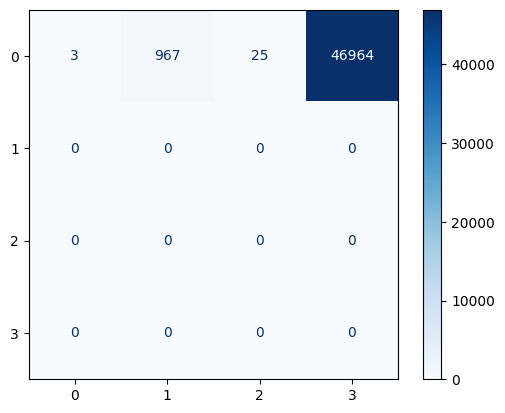

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, fbeta_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = load_model('my_model.h5')  # Adjust the filename/path as needed

# Load the full dataset
data = pd.read_csv("full_dataset.csv", index_col="timestamp")

# Select data from index 450000 to 600000
test_data = data.iloc[600000:1200000, :]

# Prepare features (X) and labels (y)
X_new = np.asarray(test_data[["displacement_left", "displacement_right"]].values)
y_new = np.asarray(test_data['Activity'].values)

# Normalize the features (same as training step)
scaler = MinMaxScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Create sliding windows for the new data (same as training step)
window_size = 36
X_new_windows = []
y_new_windows = []

for i in range(len(X_new_scaled) - window_size):
    X_new_windows.append(X_new_scaled[i:i+window_size])
    y_new_windows.append(y_new[i+window_size-1])  # Label of last point in the window

X_new_windows = np.array(X_new_windows)  # Shape: (num_samples, window_size, num_channels)
y_new_windows = np.array(y_new_windows)

# Since the labels were encoded with LabelEncoder during training, do the same here
encoder = LabelEncoder()
y_new_encoded = encoder.fit_transform(y_new_windows)

# Make predictions on the new data
predictions = model.predict(X_new_windows)

# Convert predictions to class labels (for classification)
predicted_classes = np.argmax(predictions, axis=1)
print((np.unique(y_new_encoded)))
print((np.unique(predicted_classes)))
# Adjust timestamps for the sliding window size
timestamps = test_data.index[window_size-1:]  # Use indices after the window size

# Ensure both arrays (timestamps and predictions) are of the same length
timestamps = timestamps[:len(predicted_classes)]

# Create the DataFrame for predictions
predicted_df = pd.DataFrame({
    'timestamp': timestamps,
    'predicted_class': predicted_classes
})

# Save results to a CSV file
predicted_df.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

# Calculate F-beta score (choose beta, e.g., beta=1 for F1-score)

f_beta = fbeta_score(y_new_encoded, predicted_classes, beta=1, average='weighted')
print(f"F-beta Score: {f_beta:.4f}")

# Generate confusion matrix

cm = confusion_matrix(y_new_encoded, predicted_classes)

# Display confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


## Class mapping

In [65]:
import joblib

# Assume data is already loaded and processed in X and y
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Sliding Windows
window_size = 36
X_windows = []
y_windows = []

for i in range(len(X_scaled) - window_size):
    X_windows.append(X_scaled[i:i+window_size])
    y_windows.append(y[i+window_size-1])

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

# Encode Labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Create class mapping
class_mapping = {index: label for index, label in enumerate(encoder.classes_)}
joblib.dump(class_mapping, 'class_mapping.pkl')

# Build 1D CNN Model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 2)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # 7 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Save model
model.save('my_model_new.h5')


c:\Users\Visal Kao\.conda\envs\2IA_ML_ADVANCED\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 34, 32)         │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 15, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,807 (253.15 KB)

 Trainable params: 64,807 (253.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9281 - loss: 0.3405 - val_accuracy: 0.9308 - val_loss: 0.2827
Epoch 2/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9309 - loss: 0.2859 - val_accuracy: 0.9313 - val_loss: 0.2706
Epoch 3/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9302 - loss: 0.2760 - val_accuracy: 0.9317 - val_loss: 0.2648
Epoch 4/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9309 - loss: 0.2664 - val_accuracy: 0.9320 - val_loss: 0.2546
Epoch 5/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9313 - loss: 0.2597 - val_accuracy: 0.9324 - val_loss: 0.2486
Epoch 6/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9306 - loss: 0.2568 - val_accuracy: 0.9325 - val_loss: 0.2421
Epoch 7/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9312 - loss: 0.2511 - val_accuracy: 0.9330 - val_loss: 0.2408
Epoch 8/10
16199/16199 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 

In [66]:
# Make predictions on test data
predictions = model.predict(X_test)

# Get the predicted class indices
predicted_classes_encoded = np.argmax(predictions, axis=1)

# Map the predicted class indices to their original class names
predicted_classes = [class_mapping[label] for label in predicted_classes_encoded]

# Now you have the predicted class names in `predicted_classes`
print(predicted_classes)

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
[np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.str_('none'), np.

In [69]:
from sklearn.metrics import fbeta_score

# Assume `predicted_classes` and `y_test` (the true labels) are available

# If your labels are still encoded (i.e., `y_test` is in encoded form), 
# you should decode them to their original class names as well
y_test_decoded = encoder.inverse_transform(y_test)

# Calculate the F-beta score for multi-class classification
# You can adjust the beta parameter to give more weight to precision or recall (default is beta=1, which is the F1 score)
f_beta = fbeta_score(y_test_decoded, predicted_classes, average='weighted', beta=1.0)

print(f"F-beta score: {f_beta}")


F-beta score: 0.9036314201911436


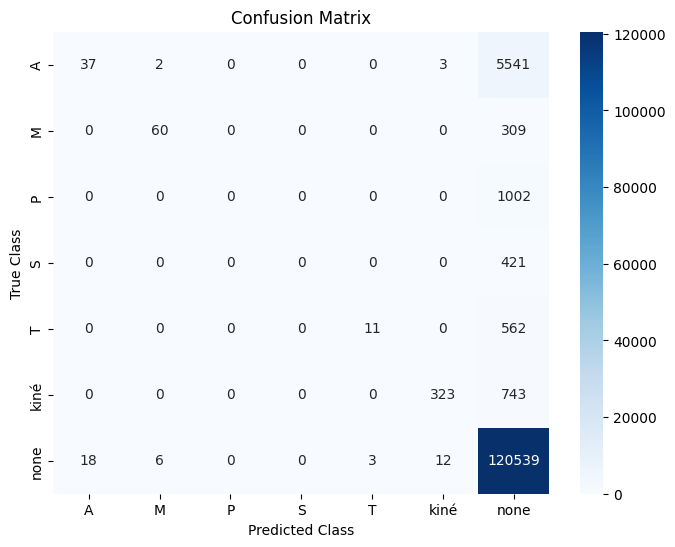

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume `predicted_classes` and `y_test` (the true labels) are available
# If your labels are encoded, you need to decode them first
ata = pd.read_csv("full_dataset.csv", index_col="timestamp")

data = data.iloc[:1000000, :]
X = np.asarray(data[["displacement_left","displacement_right"]].values)
y = np.asarray(data['Activity'].values)

# X = np.load("X_train.npy")
# # y = np.load("y_train.npy")

num_classes = len(np.unique(y))

# Decode the true labels
y_test_decoded = encoder.inverse_transform(y_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_decoded, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


RDF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = pd.read_csv('full_dataset.csv', index_col='timestamp')

# Extract the displacement features (as an example)
X = data[['displacement_left', 'displacement_right']].values
y = data['Activity'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature engineering: create lagged features and statistical features
window_size = 36
X_windows = []
y_windows = []

for i in range(window_size, len(X_scaled)):
    X_window = []
    for j in range(window_size):
        X_window.extend(X_scaled[i-j-1])  # Use past values as features (lagging)
    X_windows.append(X_window)
    y_windows.append(y[i])

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           A       1.00      0.95      0.97      4963
           M       1.00      0.95      0.97       345
           P       0.99      0.91      0.95       373
           S       1.00      0.92      0.96       323
           T       1.00      0.90      0.95       108
        kiné       1.00      0.96      0.98      1068
        none       1.00      1.00      1.00     81373

    accuracy                           1.00     88553
   macro avg       1.00      0.94      0.97     88553
weighted avg       1.00      1.00      1.00     88553



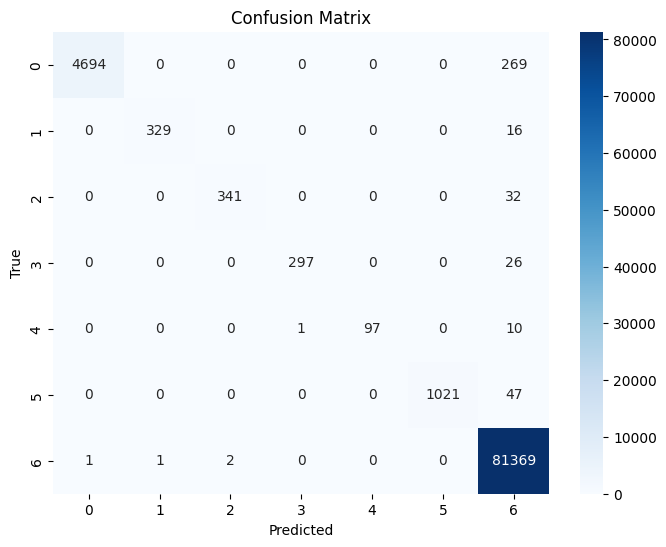

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

# Load the dataset
data = pd.read_csv('full_dataset.csv', index_col='timestamp')

data = data.loc[("2024-07-20 20:00:00"):("2024-07-25 23:00:00"), :]
# Extract relevant features
X = data[['displacement_left', 'displacement_right']].values
y = data['Activity'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create sliding windows to extract features
window_size = 36
X_features = []
y_features = []

for i in range(window_size, len(X_scaled)):
    window_data = X_scaled[i-window_size:i]  # Take the window of data
    features = []
    
    # Statistical features
    features.append(np.mean(window_data[:, 0]))  # Mean of displacement_left
    features.append(np.std(window_data[:, 0]))  # Standard deviation of displacement_left
    features.append(np.mean(window_data[:, 1]))  # Mean of displacement_right
    features.append(np.std(window_data[:, 1]))  # Standard deviation of displacement_right
    features.append(np.min(window_data[:, 0]))  # Min of displacement_left
    features.append(np.max(window_data[:, 0]))  # Max of displacement_left
    features.append(np.min(window_data[:, 1]))  # Min of displacement_right
    features.append(np.max(window_data[:, 1]))  # Max of displacement_right
    features.append(skew(window_data[:, 0]))    # Skewness of displacement_left
    features.append(kurtosis(window_data[:, 0]))  # Kurtosis of displacement_left
    features.append(skew(window_data[:, 1]))    # Skewness of displacement_right
    features.append(kurtosis(window_data[:, 1]))  # Kurtosis of displacement_right
    
    # Add other statistical features (e.g., percentiles, energy, etc.)
    
    # Convert features list to a numpy array
    X_features.append(features)
    y_features.append(y[i])  # Label corresponding to the last value in the window

# Convert to numpy arrays
X_features = np.array(X_features)
y_features = np.array(y_features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


F-beta score: 0.9953851709718475


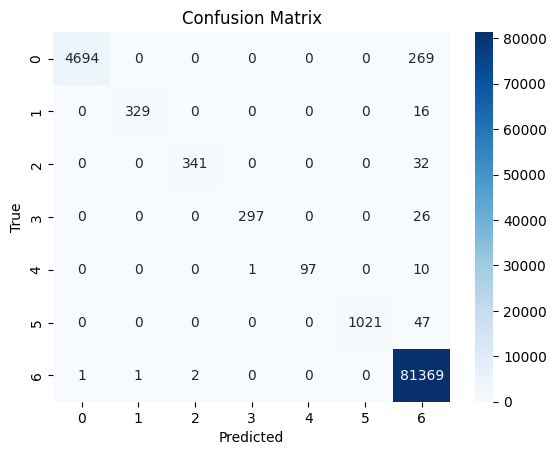

In [8]:
from sklearn.metrics import fbeta_score, confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels

# Calculate F-beta score
beta = 2  # Choose your beta value (e.g., 2 for F2, 1 for F1)
f_beta = fbeta_score(y_test, y_pred, beta=beta, average='weighted')

# Print the F-beta score
print(f"F-beta score: {f_beta}")

# If you want the confusion matrix for visualization
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [6]:
import joblib

# Save the Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.joblib')

print("Model saved successfully!")


Model saved successfully!


load

In [ ]:
# Load the Random Forest model from the file
rf_model_loaded = joblib.load('random_forest_model.joblib')

# Make predictions with the loaded model
y_pred_loaded = rf_model_loaded.predict(X_test)

# Print the results
print(classification_report(y_test, y_pred_loaded))


For data 6th day

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

# Load the dataset
data = pd.read_csv('full_dataset.csv', index_col='timestamp')

data = data.loc[("2024-07-26 00:00:00"):("2024-07-26 23:00:00"), :]
# Extract relevant features
X = data[['displacement_left', 'displacement_right']].values
y = data['Activity'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create sliding windows to extract features
window_size = 36
X_features = []
y_features = []

for i in range(window_size, len(X_scaled)):
    window_data = X_scaled[i-window_size:i]  # Take the window of data
    features = []
    
    # Statistical features
    features.append(np.mean(window_data[:, 0]))  # Mean of displacement_left
    features.append(np.std(window_data[:, 0]))  # Standard deviation of displacement_left
    features.append(np.mean(window_data[:, 1]))  # Mean of displacement_right
    features.append(np.std(window_data[:, 1]))  # Standard deviation of displacement_right
    features.append(np.min(window_data[:, 0]))  # Min of displacement_left
    features.append(np.max(window_data[:, 0]))  # Max of displacement_left
    features.append(np.min(window_data[:, 1]))  # Min of displacement_right
    features.append(np.max(window_data[:, 1]))  # Max of displacement_right
    features.append(skew(window_data[:, 0]))    # Skewness of displacement_left
    features.append(kurtosis(window_data[:, 0]))  # Kurtosis of displacement_left
    features.append(skew(window_data[:, 1]))    # Skewness of displacement_right
    features.append(kurtosis(window_data[:, 1]))  # Kurtosis of displacement_right
    
    # Add other statistical features (e.g., percentiles, energy, etc.)
    
    # Convert features list to a numpy array
    X_features.append(features)
    y_features.append(y[i])  # Label corresponding to the last value in the window

# Convert to numpy arrays
X_features = np.array(X_features)
y_features = np.array(y_features)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2, random_state=42)

# Train a Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_features)

# Print classification report
print(classification_report(y_features, y_pred))



c:\Users\Visal Kao\.conda\envs\2IA_ML_ADVANCED\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Visal Kao\.conda\envs\2IA_ML_ADVANCED\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Visal Kao\.conda\envs\2IA_ML_ADVANCED\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           P       0.00      0.00      0.00         0
        kiné       0.00      0.00      0.00         0
        none       1.00      0.99      1.00     82765

    accuracy                           0.99     82765
   macro avg       0.20      0.20      0.20     82765
weighted avg       1.00      0.99      1.00     82765



ValueError: Found input variables with inconsistent numbers of samples: [16553, 82765]

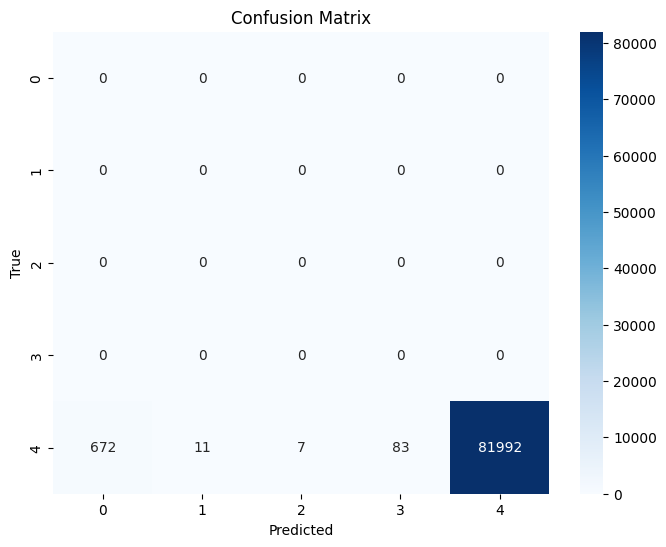

In [28]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_features, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


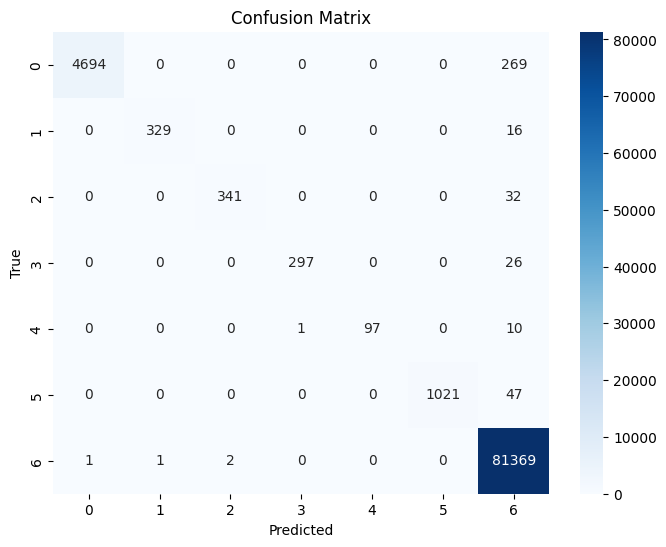

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


LSTM

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('full_dataset.csv', index_col='timestamp')

# Extract the relevant columns
X = data[['displacement_left', 'displacement_right']].values
y = data['Activity'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create sliding windows for LSTM input
window_size = 36
X_windows = []
y_windows = []

for i in range(window_size, len(X_scaled)):
    X_window = []
    for j in range(window_size):
        X_window.append(X_scaled[i-j-1])  # Add past values as features (lagging)
    X_windows.append(X_window)
    y_windows.append(y[i])

# Convert to numpy arrays
X_windows = np.array(X_windows)
y_windows = np.array(y_windows)

# Reshape X to be 3D [samples, timesteps, features] for LSTM input
X_windows = X_windows.reshape((X_windows.shape[0], X_windows.shape[1], X_windows.shape[2]))

# Encode labels
encoder = LabelEncoder()
y_windows = encoder.fit_transform(y_windows)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(window_size, X_windows.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_windows)), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the LSTM model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
